## Objective

Build machine learning regression models to predict the Apparent Temperature of a weather observation dataset basis the features provided.

In [2]:
# Improting packages and libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [3]:
# reading & previewing data
df = pd.read_csv("weatherHistory.csv", header=0) # header 0 means telling dataset has header and it is in the first (0th) line
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


## Dummy Variable Creation
- This is done to convert categorical values into numerical/boolean values for model building.

## Note: Avoid the Dummy Variable Trap
- Always remember to avoid the dummy variable trap. The way to do that is N-1.
- While creating dummy variables off of the categorical variable, always reduce the number of values by 1.

In [4]:
# deleting the unnecessary dummy variables
del df['Formatted Date']
del df['Summary']
del df['Daily Summary']

In [5]:
# creating dummy variables for all the categorical variables in the dataset
df = pd.get_dummies(df)

In [6]:
# testing the operations
df.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Precip Type_rain,Precip Type_snow
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,1,0
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,1,0
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,1,0
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,1,0
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,1,0


In [7]:
# deleting the unnecessary dummy variables
del df['Precip Type_snow']

In [8]:
# testing the operations
df.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Precip Type_rain
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,1
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,1
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,1
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,1
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,1


 ### Declaring the dependent and the independent variables

In [9]:
df.columns

Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Loud Cover', 'Pressure (millibars)', 'Precip Type_rain'],
      dtype='object')

<AxesSubplot:xlabel='Loud Cover', ylabel='count'>

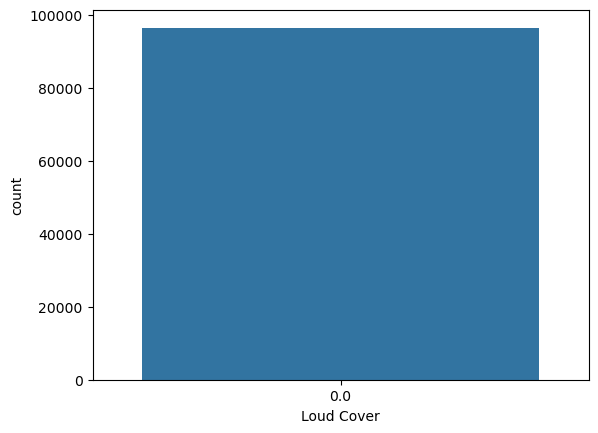

In [10]:
sns.countplot(x='Loud Cover',data=df)

In [11]:
x = df[['Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)', 'Precip Type_rain']]
y = df['Apparent Temperature (C)']## Objective

Build machine learning regression models to predict the Apparent Temperature of a weather observation dataset basis the features provided.

 ## Splitting the dataset into the Training set and Test set

 Note: Using 80:20 Train:Test split

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## Training the Multiple Linear Regression model on the Training set

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

## Predicting the Test set results

In [16]:
y_pred = regressor.predict(x_test)

Text(0, 0.5, 'Predicted Y')

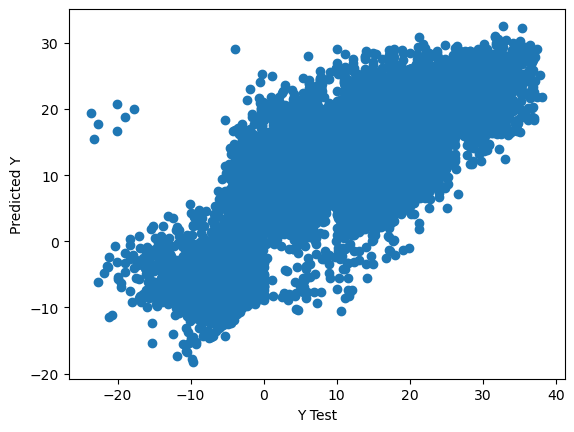

In [18]:
# comparing predictions with actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test') # Actual Values
plt.ylabel('Predicted Y') # Predicted Values

**R Squared Value**

In [19]:
# importing R2 metrics
from sklearn.metrics import r2_score

In [21]:
# r2_score(original value, predicted value)
r2_score(y_test,y_pred)

0.586883189783961

**Adjusted R Squared Value**

In [23]:
Adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y)-1)/(len(y)-x.shape[1]-1)
Adj_r2

0.5868574893831016

**Residuals**

C:\Users\soumyadip.chatterjee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


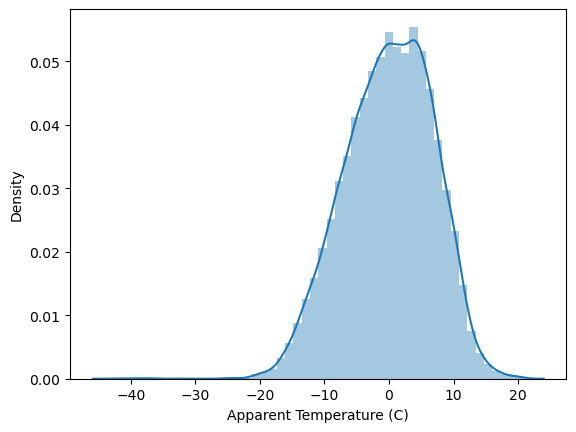

In [25]:
# plotting the distribution of residuals
sns.distplot((y_test-y_pred),bins=50);

### Observation

It is a convention that if the residuals are normally distributed then it means the model has worked pretty well given the dataset.

**Note:** If we do not observe a normal distribution of the residual, then it might mean that selection of Regression model may not have been the most optimal one.

Here the residuals are not perfectlly normally distributed and the R squared score exhibits that not a respectable amount of variations within the dependent variable is explained by the model. Therefore we should explore other regression algorithms.

## Training the Polynomial Regression model on the Training set

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(x_train)
regressor = LinearRegression()
regressor.fit(x_poly, y_train)

LinearRegression()

## Predicting the Test set results

In [28]:
y_pred = regressor.predict(poly_reg.transform(x_test))

Text(0, 0.5, 'Predicted Y')

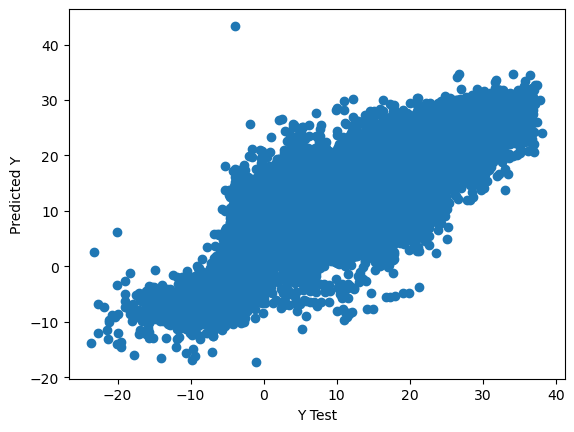

In [29]:
# comparing predictions with actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test') # Actual Values
plt.ylabel('Predicted Y') # Predicted Values

**R Squared Value**

In [32]:
# importing R2 metrics
from sklearn.metrics import r2_score

In [33]:
# r2_score(original value, predicted value)
r2_score(y_test,y_pred)

0.695463645333916

**Adjusted R Squared Value**

In [34]:
Adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y)-1)/(len(y)-x.shape[1]-1)
Adj_r2

0.6954446998294057

### Observation

The R squared score from the polynomial algorithm exhibits improvement in the model output, however it is enouraged to explore other regression algorithms to see if there are further improvements to seek.


## Training the Support Vector Regression model on the Training set

In [35]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train, y_train)

SVR()

## Predicting the Test set results

In [36]:
y_pred = regressor.predict(x_test)

Text(0, 0.5, 'Predicted Y')

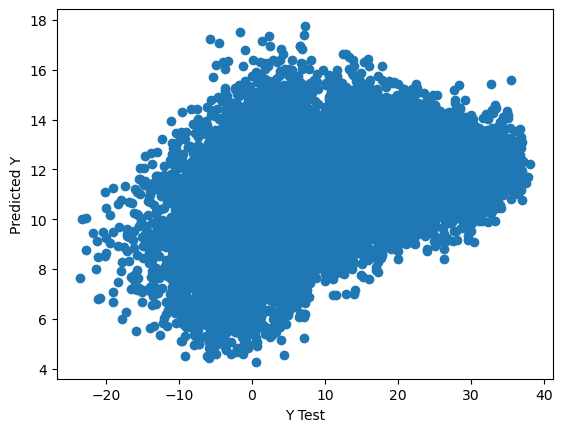

In [38]:
# comparing predictions with actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test') # Actual Values
plt.ylabel('Predicted Y') # Predicted Values

**R Squared Value**

In [40]:
# importing R2 metrics
from sklearn.metrics import r2_score

In [42]:
# r2_score(original value, predicted value)
r2_score(y_test,y_pred)

0.12181252763727213

**Adjusted R Squared Value**

In [43]:
Adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y)-1)/(len(y)-x.shape[1]-1)
Adj_r2

0.12175789473560517

### Observation

The R squared score from the SVR algorithm exhibits that quite an obnoxious amount of variations within the dependent variable is explained by the model. Therefore we should explore other regression algorithms.

## Training the Decision Tree Regression model on the Training set

In [44]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

## Predicting the Test set results

In [45]:
y_pred = regressor.predict(x_test)

Text(0, 0.5, 'Predicted Y')

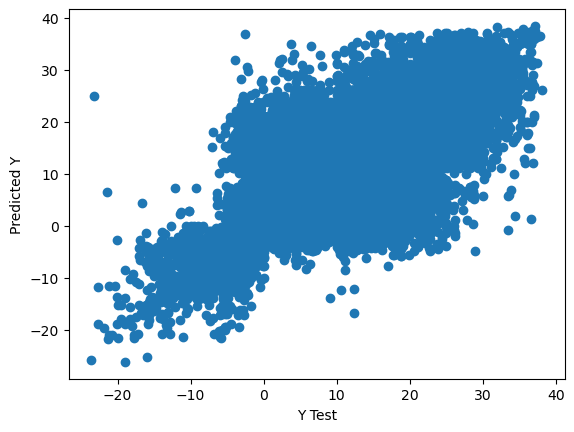

In [46]:
# comparing predictions with actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test') # Actual Values
plt.ylabel('Predicted Y') # Predicted Values

**R Squared Value**

In [47]:
# r2_score(original value, predicted value)
r2_score(y_test,y_pred)

0.4805470834513119

**Adjusted R Squared Value**

In [48]:
Adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y)-1)/(len(y)-x.shape[1]-1)
Adj_r2

0.4805147677772633

### Observation

The R squared score from the Decision Tree algorithm exhibits that not a respectable amount of variations within the dependent variable is explained by the model. Therefore we should explore other regression algorithms.

## Training the Random Forest Regression model on the whole dataset

In [49]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

## Predicting the Test set results

In [50]:
y_pred = regressor.predict(x_test)

Text(0, 0.5, 'Predicted Y')

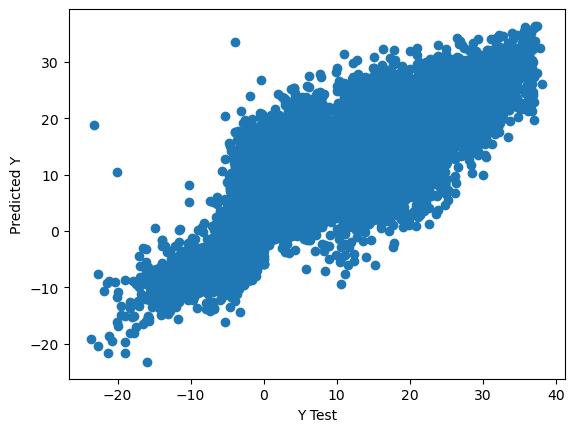

In [51]:
# comparing predictions with actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test') # Actual Values
plt.ylabel('Predicted Y') # Predicted Values

**R Squared Value**

In [52]:
# r2_score(original value, predicted value)
r2_score(y_test,y_pred)

0.709742349931332

**Adjusted R Squared Value**

In [53]:
Adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y)-1)/(len(y)-x.shape[1]-1)
Adj_r2

0.7097242927190017

## Conclusion

Upon reviewing the prediction accurancy of all the algorithms it is observed that given the sample dataset, Random Forest Regresison algorithm explains the variability within the dependent variable the most. Therefore this model should be employed to train data for better prediction.